# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 23-95% R로 분석 다시보기-5-차이를 설명하는 통계모형-1-살충제-2 (63일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 차이를 설명하는 간단한 통계모형

## 살충제를 이용한 ABCDEF 테스트 -- ANOVA


### 1. 데이터 읽기

InsectSprays 는 R 에서 기본적으로 제공하는 데이터 입니다. 따라서 InsectSpray 를 입력하면 데이터 값을 확인 할 수 있습니다. 만일 읽을수 없다면 다음과 같이 진행합니다.

In [1]:
attach(InsectSprays)
data(InsectSprays)
head(InsectSprays)

count,spray
10,A
7,A
20,A
14,A
14,A
12,A


페이지 123 에서 살충제 종류는 6개가 있으며 어느 살충제가 효과가 좋은지 실험한 데이터입니다. 먼저 간단하게 데이터의 형태를 파악해 보아요.

In [2]:
str(InsectSprays)

'data.frame':	72 obs. of  2 variables:
 $ count: num  10 7 20 14 14 12 10 23 17 20 ...
 $ spray: Factor w/ 6 levels "A","B","C","D",..: 1 1 1 1 1 1 1 1 1 1 ...


모두 72개의 관측값이 있고 2개의 변수가 있습니다. 여기에는 안보이나 전체 데이터를 보면 각 살충제별 12번 실험 한것으로 되어 있습니다. spray 변수는 6개의 수준을 나타내는데, 이것은 살충제 종류를 말합니다. 6종류의 살충제가 있습니다. count 변수는 살충제의 효과를 나타내는 것으로 죽은 벌레수를 나타냅니다.

### 2. 통계량들..

* a. 각 셀에서 평균, 분산, 그리고 살충수 등을 파악
* b. 데이터의 시각화는 먼저 boxplot 을 사용하여 데이터의 개요를 파악합니다.

각 살충제별 평균을 구하기 위해서는 6개 종류별 살충제를 다음 처럼 구하는 방법이 있습니다. 이것은 각 살충제별로 6번 작업을 해야 할 것입니다.

In [3]:
cat("A mean=", mean(count[spray=='A']), '\n')
cat("B mean=", mean(count[spray=='B']), '\n')
cat("C mean=", mean(count[spray=='C']), '\n')
cat("D mean=", mean(count[spray=='D']), '\n')
cat("E mean=", mean(count[spray=='E']), '\n')
cat("F mean=", mean(count[spray=='F']), '\n')

A mean= 14.5 
B mean= 15.33333 
C mean= 2.083333 
D mean= 4.916667 
E mean= 3.5 
F mean= 16.66667 


이것을 간단하게 tapply(response, factor, function-name) 함수를 사용합니다. t 를 안할 경우에는 jupyter 에선 warning 이 나와서 결과에 t() 함수를 적용했습니다.

In [4]:
# 평균
t(tapply(count, spray, mean))

A,B,C,D,E,F
14.5,15.33333,2.083333,4.916667,3.5,16.66667


In [5]:
# 분산
t(tapply(count, spray, var))

A,B,C,D,E,F
22.27273,18.24242,3.901515,6.265152,3,38.60606


In [6]:
# 표본들의 크기
t(tapply(count, spray, length))

A,B,C,D,E,F
12,12,12,12,12,12


In [7]:
# 그리고 책에 있는 aggregate() 함수를 이용할 수 있습니다.
aggregate(count ~ spray, data=InsectSprays, mean)

spray,count
A,14.500000
B,15.333333
C,2.083333
D,4.916667
E,3.500000
F,16.666667


aggregate() 함수는 formular 를 이용합니다. 우리가 관심있는 것은 살충제의 벌레수에 대한 각 통계량을 알아보는 것이므로 count 에 대한 spray 입니다. 따라서 formular 는 count ~ spray 가 됩니다. 다음에는 적용할 데이터를 지정하고 마지막에는 계산할 함수명을 넣습니다. 지금 평균을 계산하려고 해서 mean 을 넣었습니다.

평균을 보면 A,B,F 가 효과가 있고 C, D, E 는 효과가 적게 나옵니다.

이번에는 boxplot 대신에 ggplot2 를 이용하여 더 정보를 그래프에 표현 하도록 해봅니다. 이번그래프에는 박스플록 상자를 색깔을 주어 구분을 하고, 각 박스플록안에 평균값을 추가하고 또한 산점도 비숫하게 각 스프레이별 데이터 값(count)도 같이 표현합니다.

In [38]:
# ggplot 라이브러리 설정
library(ggplot2)

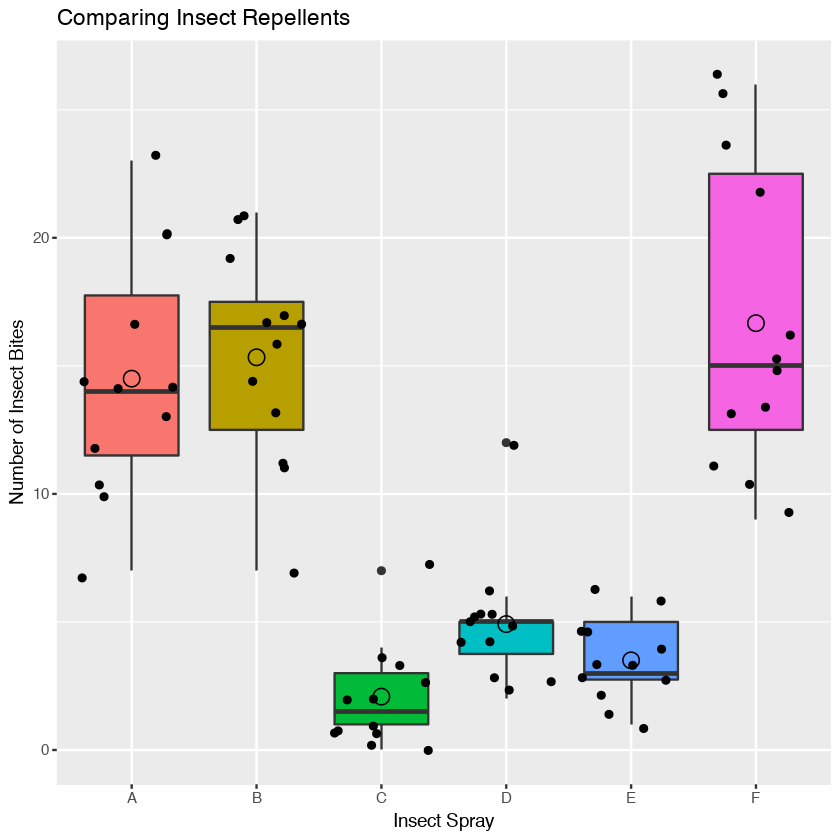

In [39]:
# Create a boxplot of the insect data set to compare the different groups
# ggplot2 로 표현
# box plot 에 추가하여 평균값 추가 (원으로 표시) shape =1, 2= triangle, 3= cross, 4=x 5=diamond,...

box_insectspray = ggplot(InsectSprays,aes(x=spray,y=count,fill=spray)) + 
  geom_boxplot() + 
  guides(fill=FALSE) + 
  stat_summary(fun.y=mean, geom="point",shape=1,size=4) +  # 평균값 표시
  xlab("Insect Spray")+ylab("Number of Insect Bites") + ggtitle("Comparing Insect Repellents") + # 타이틀 표시
  theme(plot.title=element_text(face="bold")) +
  geom_jitter()   # 데이터 표시

box_insectspray

### 페이지 203 에 있는 방식으로 분산분석 리뷰 결과

#### InsectSprays 에 대한 책에 있는 분산 분석 방법

In [9]:
# 먼저 InsectSprays 에 대한 데이터
head(InsectSprays)

count,spray
10,A
7,A
20,A
14,A
14,A
12,A


In [10]:
# InsectSpray 를 다른 변수에 저장
MyInsectSprays = InsectSprays
total_mean = mean(InsectSprays$count)
sprays_mean = rep(total_mean, length(InsectSprays$count))
head(sprays_mean)
MyInsectSprays['totalmean'] = sprays_mean
head(MyInsectSprays)

[1] 9.5 9.5 9.5 9.5 9.5 9.5

count,spray,totalmean
10,A,9.5
7,A,9.5
20,A,9.5
14,A,9.5
14,A,9.5
12,A,9.5


In [11]:
# 구릅별 평균을 구함
mygmeans = aggregate(count ~ spray, data=InsectSprays, mean)

# group mean 컬럼 설정하고 0으로 초기값 지정
dummy <- rep(0, length(MyInsectSprays))
MyInsectSprays['groupmeans'] <- dummy

# 각 수준별 구릅 평균값 설정
MyInsectSprays[MyInsectSprays$spray == 'A',]$groupmeans <- mygmeans[mygmeans$spray == "A",]$count
MyInsectSprays[MyInsectSprays$spray == 'B',]$groupmeans <- mygmeans[mygmeans$spray == "B",]$count

MyInsectSprays[MyInsectSprays$spray == 'C',]$groupmeans <- mygmeans[mygmeans$spray == "C",]$count
MyInsectSprays[MyInsectSprays$spray == 'D',]$groupmeans <- mygmeans[mygmeans$spray == "D",]$count

MyInsectSprays[MyInsectSprays$spray == 'E',]$groupmeans <- mygmeans[mygmeans$spray == "E",]$count
MyInsectSprays[MyInsectSprays$spray == 'F',]$groupmeans <- mygmeans[mygmeans$spray == "F",]$count

head(MyInsectSprays)


count,spray,totalmean,groupmeans
10,A,9.5,14.5
7,A,9.5,14.5
20,A,9.5,14.5
14,A,9.5,14.5
14,A,9.5,14.5
12,A,9.5,14.5


이제 책에 있는 방식대로 $(y - \bar y), (y - \bar y_x), (\bar y_x - \bar y)$ 의 제곱합을 구합니다. 이것은 분산을 구할때 (n-1)  를 나누지 않은것과 같으므로 결국 분산에 (n-1) 을 곱한것과 같은 결과 입니다.

In [12]:
# 그룹간 그릅내 분산 값 계산
yi_ybar = sum((MyInsectSprays$count - MyInsectSprays$totalmean)^2)
ygi_ybar = sum((MyInsectSprays$groupmeans - MyInsectSprays$totalmean)^2)
yi_ygi = sum((MyInsectSprays$count - MyInsectSprays$groupmeans)^2)

# f 값 테이블 구하기
groupv <- c(ygi_ybar, 5, ygi_ybar/5)
groupiv <- c(yi_ygi, 66, yi_ygi/66)
totalv <- c(yi_ybar, 71, yi_ybar / 71)
f_table <- data.frame(groupv, groupiv, totalv)
rownames(f_table) <- c("제곱합", "자유도", "분산(평균제곱합)")
colnames(f_table) <- c("살충제 그룹별", "살충제 그룹내", "점수")
f_table <- t(f_table)
f_table

,제곱합,자유도,분산(평균제곱합)
살충제 그룹별,2668.833,5,533.76667
살충제 그룹내,1015.167,66,15.38131
점수,3684.000,71,51.88732


이제 F-값을 구할 수 있습니다. F-값은 설명 할 수 있는 평균제곱합 (살충제 그룹별 분산) 을 설명할수 없는 평균제곱합(살충제 그룹네 분산)으로 나눈값입니다. 즉

In [13]:
f_value <- (ygi_ybar/5) / (yi_ygi/66)
f_value

[1] 34.70228

F-값은 크면 클수롤 그룹간 차이가 크다는 것을 의미합니다. 따라서 살충제의 그룹별 효과가 크다는 것을 말합니다. 지금 구한 F 값은 34.7 이 나왔으나 이값이 큰지 작은지를 알아야 합니다. 이것을 알기 위해 우리는 F-분포에서 P-값을 구하고 그 P-값이 유의수준 0.5 보다 큰지 작은지를 비교하고자 합니다.

In [14]:
# df1 는 그룹간 자유도 즉 살충제 종류 이고 df2 는 그룹내 자유도를 말합니다. 따라서 df1 = 5, df2 = 66 입니다. 
# 이미구한 f값과 자유도를 함수에 f() 함수에 넣으면 p 값이 구해 집니다.
pf(q=34.7022820554917, , df1=5, df2=66, lower.tail=FALSE)

[1] 3.182584e-17

즉 살충제 그룹별 F값은 거의 0에 가깝고, 유의값 0.5 보다 매우 작습니다. 따라서 측정된 살충제 종류별 자료는 일반적인 F분포에서 구할 수 있는 관측값이 아니고 살충제별 차이에서 오는 효과가 매우 크다고 할 수 있습니다. 

실제 살충제별 차이와 관계없는 F 값은 유의 수준 0.5 보다 크게 되는 값이므로 전체 0.95 에 속하는 f 값을 구하면 되겠습니다.

In [15]:
qf(0.95, df1=5, df2=66)

[1] 2.353809

즉 2.35 보다 큰 F 값이면 살충제별 효과는 있다고 봐야 합니다. 우리가 구한값은 34.72 입니다.

### 3 분산분석 종류

 일반적으로 2개의 모집단에 대한 평균을 비교 분석하는 경우에는 t.test() 를 활용한다면, 집단이 2개 이상일 경우에는 분산분석 (ANOVA : Analysis Of Variance) 이용합니다. 예를 들면 설명형 변수는 범주형 자료로 2개 이상의 수준이 있고 그 수준간의 연속형 변수가 있으면 수준별 집단간의 평균 비교 분석에 분산분석을 사용합니다. 예를 들면 살충제 효과인 경우에는 살충제 종류별 6개의 그룹이 있고,살충제 종류별  평균 비교에 분산분석을 사용하게 됩니다.그룹이 2개인 경우에는 보통 t-test 를 활용합니다.
 
분산 분석 종류는 그룹의 갯수 및 범주형 변수 갯수에 의해서 분류 됩니다.


* t-test : 1 범주형 변수 (2 level) , 1 연속형 변수 : y ~ X1 , y 는 X1 에 의해서만 설명
* One Way Anova(일원 분산분석) : 1 범주형 변수 (2 level 이상), 1 연속형 변수 : y ~ X1, y 는 X! 에 의해서만 설명
* Two way Anova(이원 분산분석) : 2 범주형 변수, 1 연속형 변수 : y ~ X1 + X2
* Two way Anova(이원 분산분석) : 2 범주형 변수, 1 연속형 변수 : y ~ X1 * X2 : y 는 X1, X2 그리고 X1, X2 intersection
* Three way Anova(삼원 분산분석)  : 3 범주형 변수, 1 연속형 변수 : y ~ X1 + X2 + X3
* multi way Anova (다원 분산분석) ...

살충제 경우에는 1 범주형 변수에 6개 살충제 종류, 그리고 1 연속형 변수(count 를 연속형 변수로 간주) 이므로 일원 분산 분석으로 분류할 수 있다.

### 4. 일원 분산분석
* oneway.test()
* aov()
* anova() 
등의 함수가 있다.

#### a. Oneway.test() 

In [41]:
# oneway.test()  함수
oneway.test(count ~ spray, data = InsectSprays)


	One-way analysis of means (not assuming equal variances)

data:  count and spray
F = 36.065, num df = 5.000, denom df = 30.043, p-value = 7.999e-12


* 분산은 별다른 조건이 없으면, 등분산성 을 가정하지 않음. 
* 등분산성 조건인 경우에는 var.equal = TRUE 조건을 주어야 함.
* 비 분산 등방성인 경우에는 Oneway.test() 가 고려 사항을 반영하나, 그것에 대한 정보는 제공 하지 않음.

In [45]:
# 살충제인 경우에는 등분산성을 가정해야 하므로 var.equal =T 를 주어야 함.
# 이것에 대한 것은 검정조건에서 다시 언금할 예정입니다.
oneway.test(count ~ spray, data = InsectSprays, var.equal = T)


	One-way analysis of means

data:  count and spray
F = 34.702, num df = 5, denom df = 66, p-value < 2.2e-16


#### b. aov() 함수 사용

In [44]:
aov.out <- aov(count ~ spray, data = InsectSprays)
summary(aov.out)

            Df Sum Sq Mean Sq F value Pr(>F)    
spray        5   2669   533.8    34.7 <2e-16 ***
Residuals   66   1015    15.4                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

분산분석 결과 살충제별 수준차이가 있다는 것이 나오게 되면, 3개 이상의 수준이 있게되므로, 각 수준별 평균 차이기 있는지를 검정 하여야 합니다.즉 귀무가설 $H_0$ 는 모든 수준이 같다 이면, 대립가설이 모든 수준이 같지 않다고 하면 각각을 2개씩 쌍을 지어서 어디서 차이가 나는지 확인을 하여야 합니다.

이 경우 t.test() 를 할 수 없는데 이유는 살충제인 경우 모두 6종류가 있고 이것을 2개씩 짝을 해서 하려면 모두 ${}_6C_2 = 15$ 가지 경우가 나오게 됩니다.  따라서 모두 15번의 t.test() 를 적용해야 하는데 유의수준이 0.5 라고 하면

In [46]:
1 - (0.95)^15 

[1] 0.5367088

에서 처음 유의 수준 0.05 보다 11 배 정도 크며 1종 오류가 11개 정도 나올 수 있다는 의미입니다. 따라서 이런 오류를 피하기 위해서 유의수준을 설정되 크기로 유지 하면서 모든 수준짝들의 평균을 동시에 비교 할 수 있도록 하는 방법이 다중비교(multiple comparision) 입니다. 
여기에는
* Tukey's HSD(Honestly Significant difference) test
* Duncan's LSR(least significant range) 

등이 있습니다.

### 5. Post Hoc tests

#### a. Tukey HSD

In [48]:
TukeyHSD(aov.out)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = count ~ spray, data = InsectSprays)

$spray
           diff        lwr       upr     p adj
B-A   0.8333333  -3.866075  5.532742 0.9951810
C-A -12.4166667 -17.116075 -7.717258 0.0000000
D-A  -9.5833333 -14.282742 -4.883925 0.0000014
E-A -11.0000000 -15.699409 -6.300591 0.0000000
F-A   2.1666667  -2.532742  6.866075 0.7542147
C-B -13.2500000 -17.949409 -8.550591 0.0000000
D-B -10.4166667 -15.116075 -5.717258 0.0000002
E-B -11.8333333 -16.532742 -7.133925 0.0000000
F-B   1.3333333  -3.366075  6.032742 0.9603075
D-C   2.8333333  -1.866075  7.532742 0.4920707
E-C   1.4166667  -3.282742  6.116075 0.9488669
F-C  14.5833333   9.883925 19.282742 0.0000000
E-D  -1.4166667  -6.116075  3.282742 0.9488669
F-D  11.7500000   7.050591 16.449409 0.0000000
F-E  13.1666667   8.467258 17.866075 0.0000000


일원 분산분석 결과를 보면 p값이 2e-16 으로 대립가설 $H_1$ 을 채택하고 살충제별 평균이 서로 다르다고 판단 할 수 있다. 따라서 다음 질문은 어떤 쌍을 이룬것에서 차이가 나는지를 확인 할 필요가 있습니다.  

결과를 보면 첫줄에  multiple comparisons of means 95% family-wise confidence level 이라고 나오는데 2개씩 짝을 이룬 수준간 평균의 다중 비교를 95% 신뢰수준에서 상한 (upr), 하한(lwr) 로 신뢰계수 구간을 정했고 다음에 P adj 로 p 값을 표시 하고 있습니다.

결과를 보면 p 값이 0 인 것 들중에서 살충제 C 와 A 인 경우 차이는 -12.4 이고 p 값이 0으로 유의수준 0.05 보다 작으므로 살충제 C 와 A 는 평균의 차이가 있다고 말 할 수 있습니다. 

그러나 살충제 B 와 A 인 경우에는 차이가 0.83 에 p 값이 1.0 이므로 0.05 보다 엄청크므로 두 살충제 사이에는 차이가 없다라고 이야기 할 수 있습니다. Tukey HSD 에서는 이런 살충제간 수준차이를 해석할 수 있는 정보를 제공해 줍니다.

이것은 직관적으로 boxplot 을 보면 이해가 빠를것입니다. 

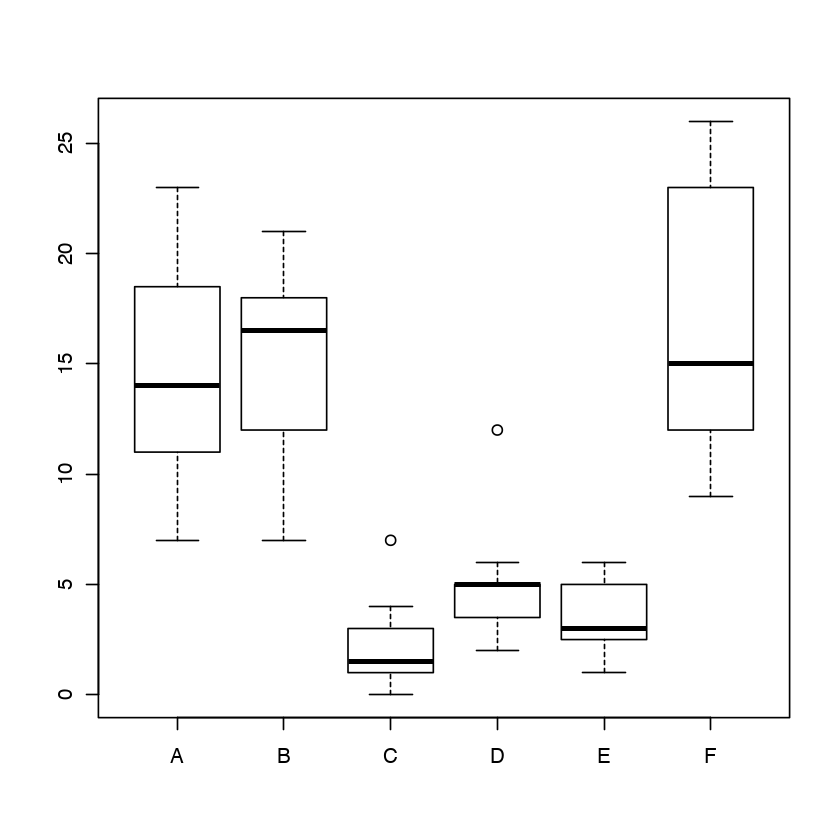

In [49]:
boxplot(count ~ spray, data = InsectSprays)

#### b. Duncan's LSR

In [50]:
# ducane.test() 함수를 이용하는 경우
library(agricolae)

ERROR: Error in library(agricolae): there is no package called ‘agricolae’


In [51]:
 library(agricolae)

In [53]:
duncan.test(aov.out, "spray", alpha = 0.5, console = T)


Study: aov.out ~ "spray"

Duncan's new multiple range test
for count 

Mean Square Error:  15.38131 

spray,  means

      count      std  r Min Max
A 14.500000 4.719399 12   7  23
B 15.333333 4.271115 12   7  21
C  2.083333 1.975225 12   0   7
D  4.916667 2.503028 12   2  12
E  3.500000 1.732051 12   1   6
F 16.666667 6.213378 12   9  26

Alpha: 0.5 ; DF Error: 66 

Critical Range
       2        3        4        5        6 
1.085913 1.159748 1.205875 1.237569 1.260591 

Means with the same letter are not significantly different.

      count groups
F 16.666667      a
B 15.333333      b
A 14.500000      b
D  4.916667      c
E  3.500000      d
C  2.083333      e


In [55]:
# LDuncan() 함수를 이용하는 경우
library(laercio)

In [56]:
LDuncan(aov.out, "spray")


 DUNCAN TEST TO COMPARE MEANS 
 
 Confidence Level:  0.95 
 Dependent Variable:  count
 Variation Coefficient:  41.28318 % 
 

 Independent Variable:  spray 
  Factors Means              
  F       16.6666666666667 a 
  B       15.3333333333333 a 
  A       14.5             a 
  D       4.91666666666667  b
  E       3.5               b
  C       2.08333333333333  b


이표의 결과는 마지막 살충제별 차이값이 표시되어 있습니다. 이값이 차이가 크면 , 수준차이가 많다고 할 수 있습니다. 그전에 먼저 aov() 함수를 통하여 p값 검정 결과 살충제별 차이가 있다고 결론이 나와 있으므로 Duncan 테스트를 하면, 각 수준별 그룹을 파악 할 수 있겠습니다.

#### 6. Contrast

ANOVA Post hoc 테스트라는 것은 이전에 설명하였다 시피 Anova 테스트를 한후에 3개 이상의 수준별 평균 차이정도를 확인 하고하 하는 방법입니다. 여기에서 간단하게  Tukey LSR 와 Duncan HSD 를 소개 하였습니다. 또한 이것을 확장하여 만일 표본별 수준의 표본 차이가 있다고 하여도 다중 수준별 차이를 검증 할 필요가 있게 됩니다.

이것을 간단하게 정리하면

* Post hoc 테스트 에서 레벨 수준을 각각 2개 씩 비교한 방법에는 Tukey HSD, Duncan LSR 
* 표본크기가 다를 경우에는 contrasts 를 사용합니다. 
* 또는 레벨 수준을 한반에 3개 이상 비교 할 경우에도 Contrasts 를 사용합니다.

콘트라스트는 둘 이상 수준 평균들을 비교하기 위해서 각 수준의 평균 값 $u_i$ 를 하나의 직선식 즉 선형회귀로 하여 각 평균을 대비 하는 방법입니다. 따라서 간단하게는 anov 분석 결과를 바로 선형 회귀분석으로 돌리는 것하고 그외 샤폐테스트 (Scheffe's T test) 들이 있습니다. 여기서는 간단하게 선형회귀만 설명 합니다.

In [57]:
# 선형회귀 콘트라스트
summary.lm(aov.out)


Call:
aov(formula = count ~ spray, data = InsectSprays)

Residuals:
   Min     1Q Median     3Q    Max 
-8.333 -1.958 -0.500  1.667  9.333 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  14.5000     1.1322  12.807  < 2e-16 ***
sprayB        0.8333     1.6011   0.520    0.604    
sprayC      -12.4167     1.6011  -7.755 7.27e-11 ***
sprayD       -9.5833     1.6011  -5.985 9.82e-08 ***
sprayE      -11.0000     1.6011  -6.870 2.75e-09 ***
sprayF        2.1667     1.6011   1.353    0.181    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.922 on 66 degrees of freedom
Multiple R-squared:  0.7244,	Adjusted R-squared:  0.7036 
F-statistic:  34.7 on 5 and 66 DF,  p-value: < 2.2e-16


결과해석은 다음과 같다. 기본베이스 평균의 값 여기서는 Spray A 의 기본 추정치와 표준편차, t 값 등을 계산하고 거기서 나머지 스프레이 들은 차이값을 계산해서 같은 방법으로 계산합니다. Estimation 에서 보면 스프레이 A 와 차이가 나지 않는 것은 Spray B 와 F 입니다. Spray C, E D 는 서로 같은 종류 일것입니다.

* (Intercept) Estimate : 14.5000 --> 기본 평균 (여기서는 Spray A) 를 말한다.
* 12.5000 이하 같은 컬럼 : Spray A 대시 다른 Spray 들의 추정평균치 와 차이
* Std.Error : 추정값들의 표준에러 (즉 계산된 값과 실제 평균과의)
* t value : 평균들의 t-test 

### 6. ANOV 테스트 하기 위한 조건 들

일원베치 분산분석 을 수행하기 위해선 사전에 다음과 같은 사항을 확인 해야 합니다.
* 독립성
* 정규성 (정규분포)
* 등분산성 

이중에서 독립성이란 독립변수의 그룹군은 상호 독립적이라는 것입니다. 살충제 예에서 보면 살충제 종류 A,B,C,D,E,F 는 서로 종속적이지 않고 서로 영향을 끼치지 않는 독립적이라는 것입니다.

정규성이란 독립변수에 대한 종속변수는 정규분포를 가져야 한다는 것입니다. 정규분포를 확인 하기 위해 Shapiro-Wilk 를 수행 합니다.

In [65]:
# Shapiro-Wilk test
tapply(InsectSprays$count, InsectSprays$spray, shapiro.test)

shapiro.test(InsectSprays$count)

$A

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.95757, p-value = 0.7487


$B

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.95031, p-value = 0.6415


$C

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.85907, p-value = 0.04759


$D

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.75063, p-value = 0.002713


$E

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.92128, p-value = 0.2967


$F

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.88475, p-value = 0.1009




	Shapiro-Wilk normality test

data:  InsectSprays$count
W = 0.9216, p-value = 0.0002525


6 개 그릅 을 확인해보면 A, B, E, F 는 0.05 보다 크므로 정규분포를 갖고 있으나, C, D 는 0.05 보다 작습니다. 따라서 C,D 는 정규분포 형태를 가지고 있지 않습니다.

등분상성이란 설명변수에 대한 관심변수의 분산은 설명변수 각 그룹마다 분산은 동일해야 한다는 것입니다. 여기에는 bartlett 과 levene 검증을 수행합니다.

확실히 전체 count 테스트에서도 p 값이 0.05 보다 작게 나오므로 count 데이터는 정규분포를 가지고 있지 않습니다.

In [60]:
# bartlett test
bartlett.test(count ~ spray, data = InsectSprays)


	Bartlett test of homogeneity of variances

data:  count by spray
Bartlett's K-squared = 25.96, df = 5, p-value = 9.085e-05


p 값이 0.05 보다 매우 작기때문에 등분산성을 충족하지 않습니다. 따라서 분산이 모든 스프레이 종류에 대해서 동등하지 않습니다.

결과를 그래프로 확인해 볼수 있습니다.

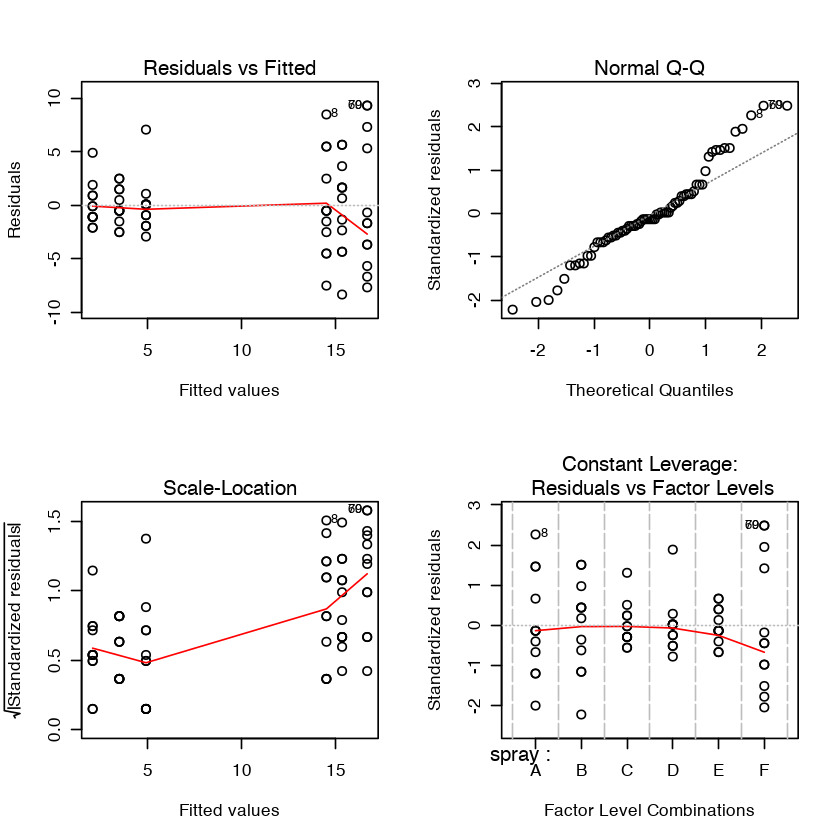

In [62]:
par(mfrow = c(2,2))
plot(aov.out)

의 그림 두번째에서 보면 Q-Q plot -1 에서 1 구간은 정규분포를 가지고 있으나 그이외 구간에서는 정규 분포를 가지고 있지 않습니다. 따라서  ANOVA 결과가 잘 못 나올수 있기 때문에 사후에라도 결과를 다른것과 비교 확인 하여야 합니다.

다음에는 two-way anova 에 대해서 간단하게 정리 하겠습니다.